In [1]:
from SPV_utils import *

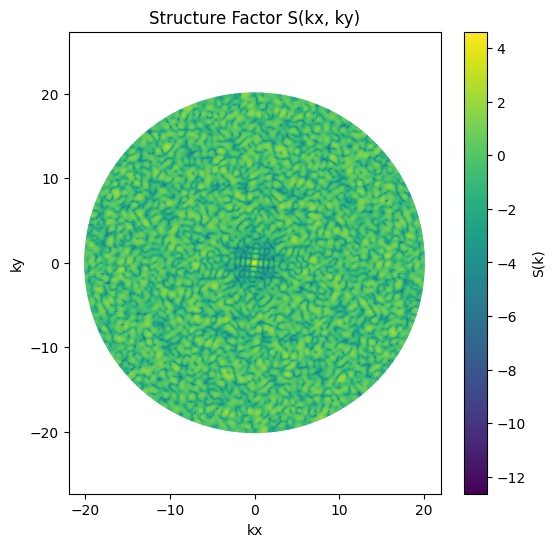

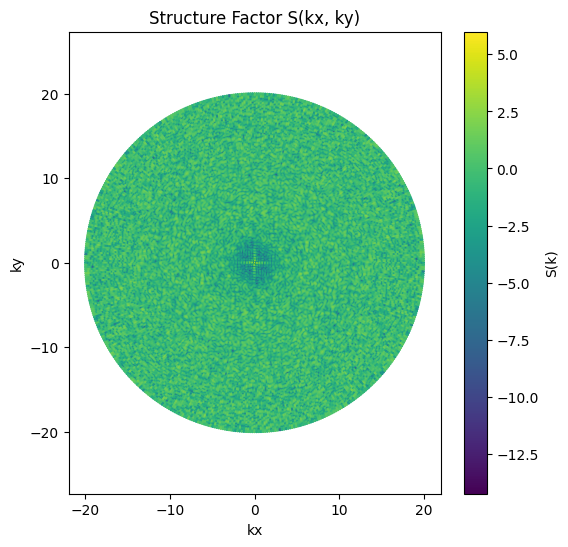

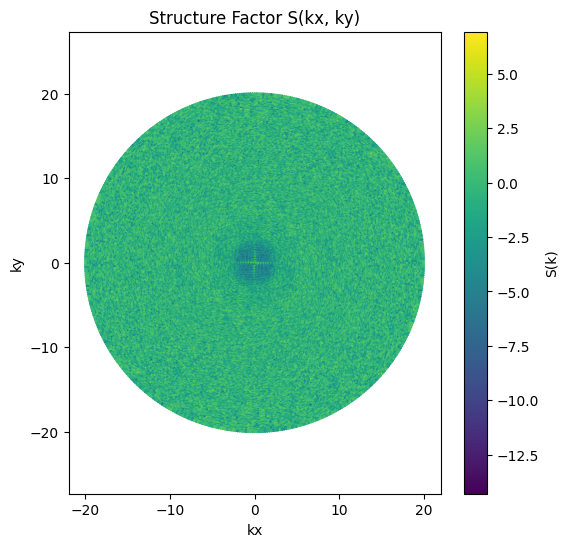

In [2]:
results = {}

for N in [100, 400, 1024]:
    i = 5
    folder = rf"N={N}_pin=0\N={N}\coordinate_p0=3.80_v0=0.50_pin=0_set_{9}/"   #should i avg over sets
    timestamps, arrays = get_data_from_folder(folder)
    init_pos = arrays[100]    #should i take it at zero???
    
    k_vectors, context = get_polar_k_grid(k_max = 20, n_k = 500, n_theta = 500)
    S_flat = Sf_iso(k_vectors, init_pos)   # shape (n_kx*n_ky,)
    S_2d = display_polar_k_grid(S_flat, context)
    results[N] = (S_2d, context[2])


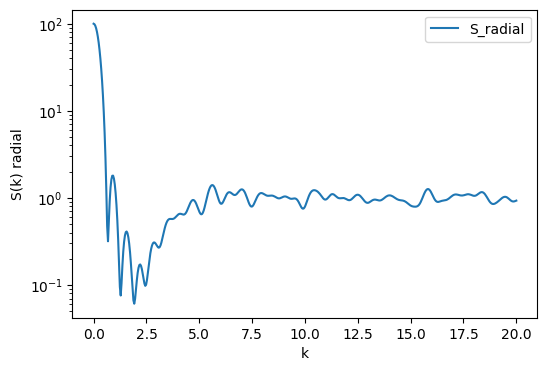

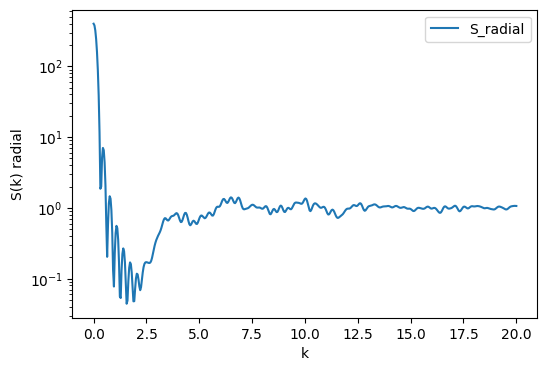

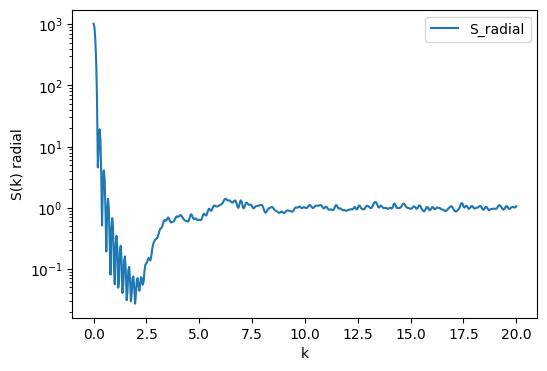

In [7]:
peaksresult = {}

for N in [100, 400, 1024]:
 
    peaks = get_radial_peaks(*results[N], threshold =1.2)
    peaksresult[N] = np.array(peaks)

In [4]:
peaksresult

{100: array([[ 0.92184369,  1.80227072],
        [ 5.61122244,  1.40506067],
        [ 7.01402806,  1.25434723],
        [10.42084168,  1.22643572],
        [15.83166333,  1.26416128]]),
 400: array([[ 0.44088176,  7.02584184],
        [ 0.76152305,  1.45833285],
        [ 6.17234469,  1.33434857],
        [ 6.49298597,  1.40517887],
        [ 6.85370741,  1.3961518 ],
        [10.02004008,  1.35590892]]),
 1024: array([[ 0.28056112, 19.17827878],
        [ 0.48096192,  4.08842106],
        [ 0.68136273,  1.40107923],
        [ 6.25250501,  1.40523794],
        [ 6.41282565,  1.31996852],
        [ 6.69338677,  1.32019052],
        [ 6.9739479 ,  1.32602602],
        [ 7.25450902,  1.20695952],
        [13.34669339,  1.2428171 ]])}

looks like $$peak = \frac{2 \pi}{ln(2)\sqrt{N}}$$

In [5]:
for N in peaksresult.keys():
    print((2*np.pi/peaksresult[N][0][0])/np.sqrt(N))

0.6815890148440464
0.712570333700594
0.6998458634559405


In [6]:
(2*np.pi/peaksresult[1024][0][0])

np.float64(22.395067630590095)

I think this is all wrong. the first peak corresponds to the largest spacing, which here is the size of the box!!

im essentially using the k corresponding to box size 


do i need the k corresponding to the smallest spacing??
